In [118]:
#### PHASE ONE: CHECK EVERYTHING ####
# STEP ONE
# load everything
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

# load dataframe
expression_df = pd.read_csv("/content/sample_data/THESIS/GSE108497_raw.tsv", sep="\t", index_col=0)

In [54]:
# STEP 2
# check dataframe
# see first few rows of dataset
expression_df.head(5)

,GSM2901826,GSM2901827,GSM2901828,GSM2901829,GSM2901830,GSM2901831,GSM2901832,GSM2901833,GSM2901834,GSM2901835,...,GSM2902328,GSM2902329,GSM2902330,GSM2902331,GSM2902332,GSM2902333,GSM2902334,GSM2902335,GSM2902336,GSM2902337
gene,,,,,,,,,,,,,,,,,,,,,
EEF1A1,13.875300,13.909054,14.025441,13.683216,13.923740,13.727085,14.010168,14.117798,13.861524,13.555348,...,14.050222,13.385198,13.914049,13.941927,13.620335,12.976212,13.735491,13.825749,14.090491,14.060387
GAPDH,11.343188,11.241522,11.031051,11.259911,11.392425,11.562010,11.335288,10.953754,11.176741,11.164819,...,11.216188,11.402937,11.772067,11.263936,11.208338,11.141570,10.995710,11.425990,11.471332,11.573480
SLC35E2A,4.611838,4.448464,5.051040,5.018538,5.049110,4.644817,5.143432,4.865061,4.584262,4.752215,...,4.696324,4.803816,4.930717,4.778425,4.883161,4.550983,4.754289,4.867337,5.150634,4.776116
RPS28,12.569245,11.610888,11.926383,12.693447,11.831658,11.580271,12.573093,12.028145,11.559711,12.314642,...,11.980780,12.227999,11.353636,11.105736,10.786696,11.913131,11.878504,12.017417,12.448172,12.697129
IPO13,6.549957,6.524421,6.115866,6.919106,6.748423,6.859619,6.505282,6.224477,6.047737,6.654075,...,6.132318,7.075979,6.851842,6.664372,5.932977,6.708681,6.932569,6.665331,6.325681,6.827345


In [55]:
# see last few rows of dataset
expression_df.tail(5)

,GSM2901826,GSM2901827,GSM2901828,GSM2901829,GSM2901830,GSM2901831,GSM2901832,GSM2901833,GSM2901834,GSM2901835,...,GSM2902328,GSM2902329,GSM2902330,GSM2902331,GSM2902332,GSM2902333,GSM2902334,GSM2902335,GSM2902336,GSM2902337
gene,,,,,,,,,,,,,,,,,,,,,
HOTAIRM1,4.728393,4.676160,5.754131,4.720788,5.160461,5.821707,4.822670,5.018538,5.053371,4.917033,...,5.226867,5.296541,5.026248,5.700711,5.689785,5.962062,6.213491,5.282929,5.515688,5.357144
HIST1H3I,4.798975,4.750577,6.090864,4.676229,4.670962,4.514632,4.638068,4.531413,4.911594,5.066854,...,4.619252,4.783672,4.465761,5.059526,4.474753,4.509968,4.511995,5.377988,4.643657,4.435377
MBNL1-AS1,4.689223,4.583934,4.414629,4.624216,4.471361,4.895281,4.559784,4.504394,4.783672,4.394460,...,4.584262,4.571203,4.566074,4.470406,4.439753,4.566664,4.361996,4.983296,4.593118,5.112653
LOC102725126,6.496294,6.191149,6.766918,6.768596,6.753981,5.714771,6.162201,6.804885,6.149686,6.653756,...,5.542749,5.765213,6.404377,6.347840,6.521631,6.223908,5.889207,6.618402,6.135664,6.435965
FRG1HP,6.496294,6.191149,6.766918,6.768596,6.753981,5.714771,6.162201,6.804885,6.149686,6.653756,...,5.542749,5.765213,6.404377,6.347840,6.521631,6.223908,5.889207,6.618402,6.135664,6.435965


In [56]:
# ADD HERE, HOW MANY GENES AND SAMPLES WE HAVE, AND EVERYTHING ELSE WE MIGHT WANT TO KNOW FROM THIS DATAFRAME
# CHECK OLD CODE/ GITHUB
expression_df.shape

(13416, 512)

In [59]:
# Count how many genes
num_genes = expression_df.shape[0]
print("Number of genes:", num_genes)

Number of genes: 13416


In [60]:
# Count how many samples
# expression_df.shape returns a tuple: (number_of_genes, number_of_samples)
# So shape[1] gives you the number of columns, i.e., samples
num_samples = expression_df.shape[1]
print("Number of samples:", num_samples)

Number of samples: 512


In [61]:
# STEP 3
# check for existing NAs in every cell (a bit confusing so we need the total one)
# expression_df.isna()
# to check total NAs in each row
# print(f"\nTotal NAs in dataset: {expression_df.isna().sum()}")
# to check total NAs
print(f"\nTotal NAs in dataset: {expression_df.isna().sum().sum()}")


Total NAs in dataset: 0


In [62]:
# STEP 4
# check for duplicate genes
expression_df.index.duplicated()
print(f"Any duplicated genes: {expression_df.index.duplicated().any()}")

Any duplicated genes: False


In [63]:
# BEFORE STEP 5, where we make the graphs to actively see our dataset,
# I want to check the type of variables in every dataset, to see if we actually get
# the proper ones for each graph
print(expression_df.dtypes)

GSM2901826    float64
GSM2901827    float64
GSM2901828    float64
GSM2901829    float64
GSM2901830    float64
               ...   
GSM2902333    float64
GSM2902334    float64
GSM2902335    float64
GSM2902336    float64
GSM2902337    float64
Length: 512, dtype: object


In [64]:
# which proves all are floats, so we can move on

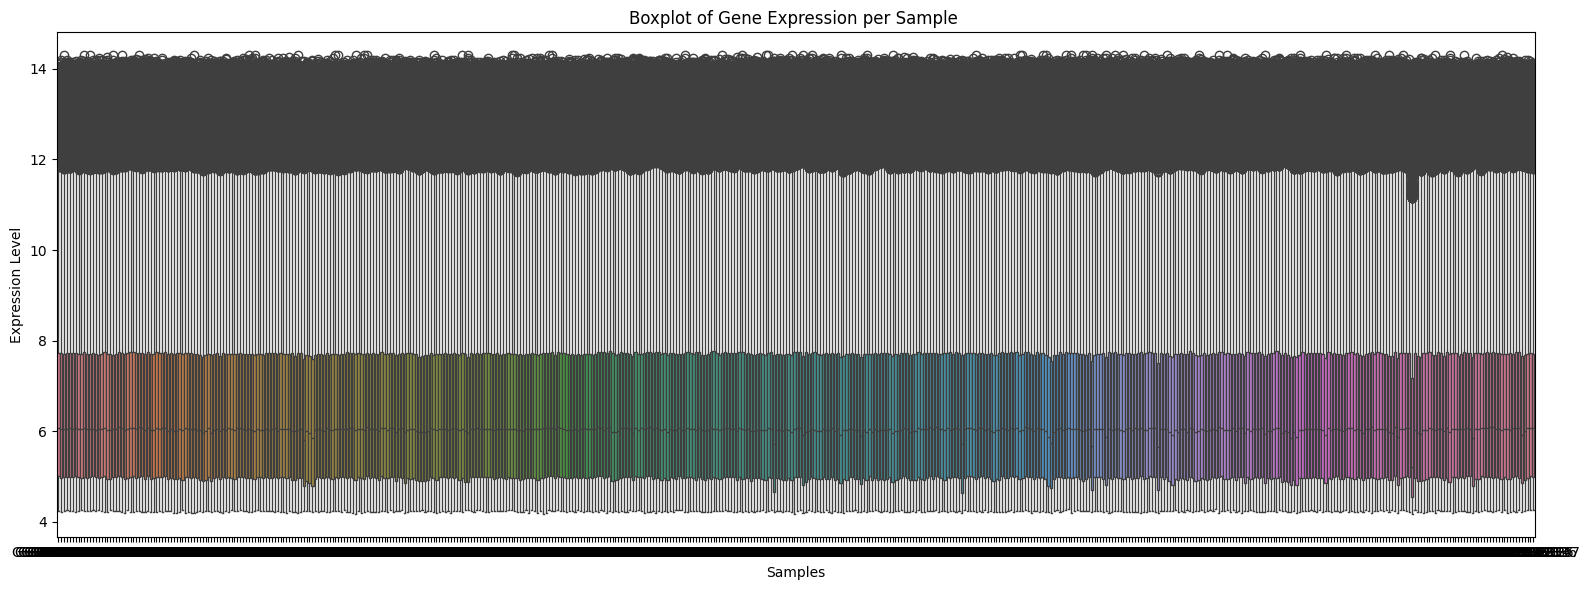

In [65]:
# STEP 5
# make distribution plots before Gene filtering

# BOXPLOT to visualise normalisation
plt.figure(figsize=(16, 6))
sns.boxplot(data=expression_df)
plt.title("Boxplot of Gene Expression per Sample ")
plt.xlabel("Samples")
plt.ylabel("Expression Level")
plt.tight_layout()
plt.show()

In [66]:
# you can clearly see that we have 512 samples, so it is not possible to get a clear picture
# BUT we can make out the fact that visually some boxes are of different interquantile range
# therefore they have dissimilar spread and could mean they are outliers
# how to remove them:
# calculate median of each one of the samples' medians
medians = expression_df.median()

In [67]:
# Calculate median of all the samples' medians and IQR (interquartile range) of the medians
median_of_medians = medians.median()
iqr = medians.quantile(0.75) - medians.quantile(0.25)

# Outlier being more than 1.5*IQR from the median:
lower_bound = median_of_medians - 1.5 * iqr
upper_bound = median_of_medians + 1.5 * iqr

outlier_samples = medians[(medians < lower_bound) | (medians > upper_bound)]
print("Samples with outlier median expression levels:")
print(outlier_samples)

Samples with outlier median expression levels:
GSM2901876    5.960011
GSM2901879    5.971216
GSM2901911    5.801219
GSM2901913    5.956748
GSM2901914    5.843075
GSM2901943    5.976430
GSM2901946    5.990094
GSM2901951    5.984674
GSM2901952    5.986601
GSM2901953    5.983964
GSM2901968    5.950913
GSM2902017    6.098362
GSM2902018    5.990094
GSM2902019    5.985082
GSM2902025    5.971343
GSM2902037    5.980228
GSM2902074    5.720619
GSM2902080    5.976597
GSM2902084    5.915770
GSM2902085    5.987679
GSM2902097    5.928055
GSM2902104    5.897130
GSM2902106    5.990614
GSM2902108    5.986629
GSM2902115    5.960839
GSM2902121    5.989340
GSM2902139    5.710481
GSM2902150    5.988728
GSM2902169    5.869532
GSM2902170    5.736212
GSM2902184    5.667029
GSM2902189    5.876749
GSM2902207    5.641793
GSM2902211    5.980037
GSM2902212    5.915220
GSM2902214    5.991630
GSM2902217    5.991630
GSM2902220    5.974162
GSM2902237    5.952683
GSM2902244    5.941890
GSM2902250    5.967661
GSM2902252

In [68]:
sum_outliers = outlier_samples.shape[0]   # or len(outlier_samples)
print("Number of outlier samples:", sum_outliers)

Number of outlier samples: 56


In [69]:
# Assuming you already have outlier_samples and median_of_medians
deviation = outlier_samples - median_of_medians
print("Deviation from median for each outlier sample:")
print(deviation)

Deviation from median for each outlier sample:
GSM2901876   -0.084610
GSM2901879   -0.073404
GSM2901911   -0.243402
GSM2901913   -0.087873
GSM2901914   -0.201546
GSM2901943   -0.068191
GSM2901946   -0.054527
GSM2901951   -0.059947
GSM2901952   -0.058020
GSM2901953   -0.060656
GSM2901968   -0.093707
GSM2902017    0.053742
GSM2902018   -0.054527
GSM2902019   -0.059538
GSM2902025   -0.073277
GSM2902037   -0.064392
GSM2902074   -0.324002
GSM2902080   -0.068024
GSM2902084   -0.128851
GSM2902085   -0.056942
GSM2902097   -0.116565
GSM2902104   -0.147491
GSM2902106   -0.054007
GSM2902108   -0.057991
GSM2902115   -0.083782
GSM2902121   -0.055281
GSM2902139   -0.334139
GSM2902150   -0.055892
GSM2902169   -0.175089
GSM2902170   -0.308408
GSM2902184   -0.377592
GSM2902189   -0.167872
GSM2902207   -0.402827
GSM2902211   -0.064584
GSM2902212   -0.129401
GSM2902214   -0.052991
GSM2902217   -0.052991
GSM2902220   -0.070459
GSM2902237   -0.091937
GSM2902244   -0.102731
GSM2902250   -0.076960
GSM2902252

In [70]:
# check if we have any extreme outliers
lower_extreme = median_of_medians - 3 * iqr
upper_extreme = median_of_medians + 3 * iqr
extreme_outliers = medians[(medians < lower_extreme) | (medians > upper_extreme)]
print("Extreme outlier samples (>3*IQR):")
print(extreme_outliers)

Extreme outlier samples (>3*IQR):
GSM2901911    5.801219
GSM2901914    5.843075
GSM2902074    5.720619
GSM2902084    5.915770
GSM2902097    5.928055
GSM2902104    5.897130
GSM2902139    5.710481
GSM2902169    5.869532
GSM2902170    5.736212
GSM2902184    5.667029
GSM2902189    5.876749
GSM2902207    5.641793
GSM2902212    5.915220
GSM2902253    5.840454
GSM2902255    5.869888
GSM2902265    5.926268
GSM2902290    5.868464
GSM2902295    5.204648
GSM2902316    5.840291
GSM2902333    5.918952
dtype: float64


In [71]:
sum_extr_outliers = extreme_outliers.shape[0]   # or len(outlier_samples)
print("Number of extreme outlier samples:", sum_extr_outliers)

Number of extreme outlier samples: 20


In [72]:
# to check if any of the outliers are technical outliers, we calculate if most of all of their genes are also outliers
extreme_outliers_names = extreme_outliers.index.tolist()
extreme_outliers_counts = {}
Q1 = expression_df.quantile(0.25, axis=1)
Q3 = expression_df.quantile(0.75, axis=1)
IQR = Q3 - Q1
lower_gene = Q1 - 1.5 * IQR
upper_gene = Q3 + 1.5 * IQR
print("Percentage of gene outliers per extreme outlier sample:")
for sample in extreme_outliers.index:
    gene_values = expression_df[sample]
    outlier_calculation = (gene_values < lower_gene) | (gene_values > upper_gene)
    n_gene_outliers = outlier_calculation.sum()
    gene_percentage = 100 * n_gene_outliers / len(expression_df)
    print(f"{sample}: {n_gene_outliers} out of {len(expression_df)} genes ({gene_percentage:.1f}%)")

Percentage of gene outliers per extreme outlier sample:
GSM2901911: 1973 out of 13416 genes (14.7%)
GSM2901914: 1657 out of 13416 genes (12.4%)
GSM2902074: 5630 out of 13416 genes (42.0%)
GSM2902084: 2077 out of 13416 genes (15.5%)
GSM2902097: 849 out of 13416 genes (6.3%)
GSM2902104: 1321 out of 13416 genes (9.8%)
GSM2902139: 5122 out of 13416 genes (38.2%)
GSM2902169: 1541 out of 13416 genes (11.5%)
GSM2902170: 2384 out of 13416 genes (17.8%)
GSM2902184: 3324 out of 13416 genes (24.8%)
GSM2902189: 1424 out of 13416 genes (10.6%)
GSM2902207: 3060 out of 13416 genes (22.8%)
GSM2902212: 2108 out of 13416 genes (15.7%)
GSM2902253: 1489 out of 13416 genes (11.1%)
GSM2902255: 1214 out of 13416 genes (9.0%)
GSM2902265: 661 out of 13416 genes (4.9%)
GSM2902290: 1740 out of 13416 genes (13.0%)
GSM2902295: 6213 out of 13416 genes (46.3%)
GSM2902316: 1759 out of 13416 genes (13.1%)
GSM2902333: 864 out of 13416 genes (6.4%)


In [78]:
# I do not see any that have the majority of their genes as outliers, but there some samples to take note
# with their gene outlier percentages being over 20%
samples_to_remove =[]
gene_percentages = {}
print("Percentage of gene outliers per outlier sample:")
for sample in extreme_outliers.index:
    gene_values = expression_df[sample]
    outlier_calculation = (gene_values < lower_gene) | (gene_values > upper_gene)
    n_gene_outliers = outlier_calculation.sum()
    gene_percentage = 100 * n_gene_outliers / len(expression_df)
    if gene_percentage > 20:
      samples_to_remove.append(sample)
      gene_percentages[sample] = gene_percentage
      print(f"{sample}: {n_gene_outliers} out of {len(expression_df)} genes ({gene_percentage:.1f}%)")

Percentage of gene outliers per outlier sample:
GSM2902074: 5630 out of 13416 genes (42.0%)
GSM2902139: 5122 out of 13416 genes (38.2%)
GSM2902184: 3324 out of 13416 genes (24.8%)
GSM2902207: 3060 out of 13416 genes (22.8%)
GSM2902295: 6213 out of 13416 genes (46.3%)


In [74]:
print(samples_to_remove) # to verify

['GSM2902074', 'GSM2902139', 'GSM2902184', 'GSM2902207', 'GSM2902295']


In [79]:
# confirm these samples are abnormal before removing:
# first, check if the samples are healthy or sle
# also check if they come from the same donor
# or even the same timepoint or batch,
# to make sure there arent any batch effects
# Load metadata
metadata = pd.read_csv('/content/sample_data/THESIS/GSE108497_updated_metadata.tsv', sep='\t', encoding='latin-1')
# Subset metadata and add gene_percentage
gene_removal_df = metadata[metadata['Sample'].isin(samples_to_remove)].copy()
gene_removal_df['Gene_Percentage'] = gene_removal_df['Sample'].map(gene_percentages)

# Select and rename columns
gene_removal_df = gene_removal_df[['Sample', 'Condition', 'Donor_id', 'time_point', 'batch', 'Gene_Percentage']].copy()

# Display
print(gene_removal_df.to_string(index=False))

    Sample Condition Donor_id  time_point  batch  Gene_Percentage
GSM2902074       SLE       A1   <16 weeks      2        41.964818
GSM2902139       SLE     T112          PP      2        38.178295
GSM2902184       SLE      U58   <16 weeks      1        24.776386
GSM2902207       SLE      N62 16-23 weeks      4        22.808587
GSM2902295       SLE      N69 32-40 weeks      1        46.310376


In [80]:
# although al of them are SLE, they come from 4 different donors, different time points (even the biggest percentages)
# so no batch effects for now

In [88]:
# second, ap each sample to its donor, and find other samples for the same donor
# to investigate if there is some kind of abnormal behaviour in the other samples(taken in other timepoints) of the same donor
# if the any or all of the rest of the samples are included in the extreme outliers
# Then the donor's samples behaviour COULD be considered normal
donor_map = {}
other_samples_list = []
for sample in samples_to_remove:
    donor_id = metadata.loc[metadata['Sample'] == sample, 'Donor_id'].values[0]
    donors_sample_list = metadata[metadata['Donor_id'] == donor_id]['Sample'].tolist()
    # Exclude the original sample from the list of "other" samples
    other_samples = [other_sample for other_sample in donors_sample_list if other_sample != sample]
    donor_map[sample] = {'Donor_id': donor_id,'Other_samples': other_samples}
    other_samples_list.extend(other_samples)
print("\nDonor mapping and other samples:")
for sample, info in donor_map.items():
    print(f"Sample {sample} → Donor {info['Donor_id']}, Other samples: {info['Other_samples']}")


Donor mapping and other samples:
Sample GSM2902074 → Donor A1, Other samples: ['GSM2902095']
Sample GSM2902139 → Donor T112, Other samples: ['GSM2902087', 'GSM2902106']
Sample GSM2902184 → Donor U58, Other samples: ['GSM2902224', 'GSM2902309']
Sample GSM2902207 → Donor N62, Other samples: ['GSM2902166', 'GSM2902250', 'GSM2902293', 'GSM2902324']
Sample GSM2902295 → Donor N69, Other samples: ['GSM2902168', 'GSM2902209', 'GSM2902252', 'GSM2902325']


In [89]:
# now wanna check if these aother samples are in the extreme outlier list to explain some of the donors' samples behaviour
for sample in other_samples_list:
    if sample in extreme_outliers_names:
        print(f"Sample {sample} is an extreme outlier.")
    else:
        print(f"Sample {sample} is not an extreme outlier.")
# NO OTHER SAMPLE IS IN EXTREME OUTLIERS, SO THE PROBLEM LIES WITH THESE 5 FOR SURE

Sample GSM2902095 is not an extreme outlier.
Sample GSM2902087 is not an extreme outlier.
Sample GSM2902106 is not an extreme outlier.
Sample GSM2902224 is not an extreme outlier.
Sample GSM2902309 is not an extreme outlier.
Sample GSM2902166 is not an extreme outlier.
Sample GSM2902250 is not an extreme outlier.
Sample GSM2902293 is not an extreme outlier.
Sample GSM2902324 is not an extreme outlier.
Sample GSM2902168 is not an extreme outlier.
Sample GSM2902209 is not an extreme outlier.
Sample GSM2902252 is not an extreme outlier.
Sample GSM2902325 is not an extreme outlier.


In [91]:
# calculate skewness before droping genes
# FOR NEXT STEP - histogram

# why?
# Quackenbush 2002 showed that log₂‐normalized microarray intensities will still be right‐skewed,
# and recommended you expect a non‐zero skew even after log‐transformation.
# Church et al. 2019 found that after log₂‐transforming RNA‐seq counts the median gene‐by‐gene skewness
# was still well above zero (they reported values closer to 0.8 in their cohort).
gene_skew_before = expression_df.skew(axis=1)
median_skew = gene_skew_before.median()
print(median_skew)

0.09211903035696666


In [92]:
# # so might as well remove them
expression_df = expression_df.drop(columns=samples_to_remove)

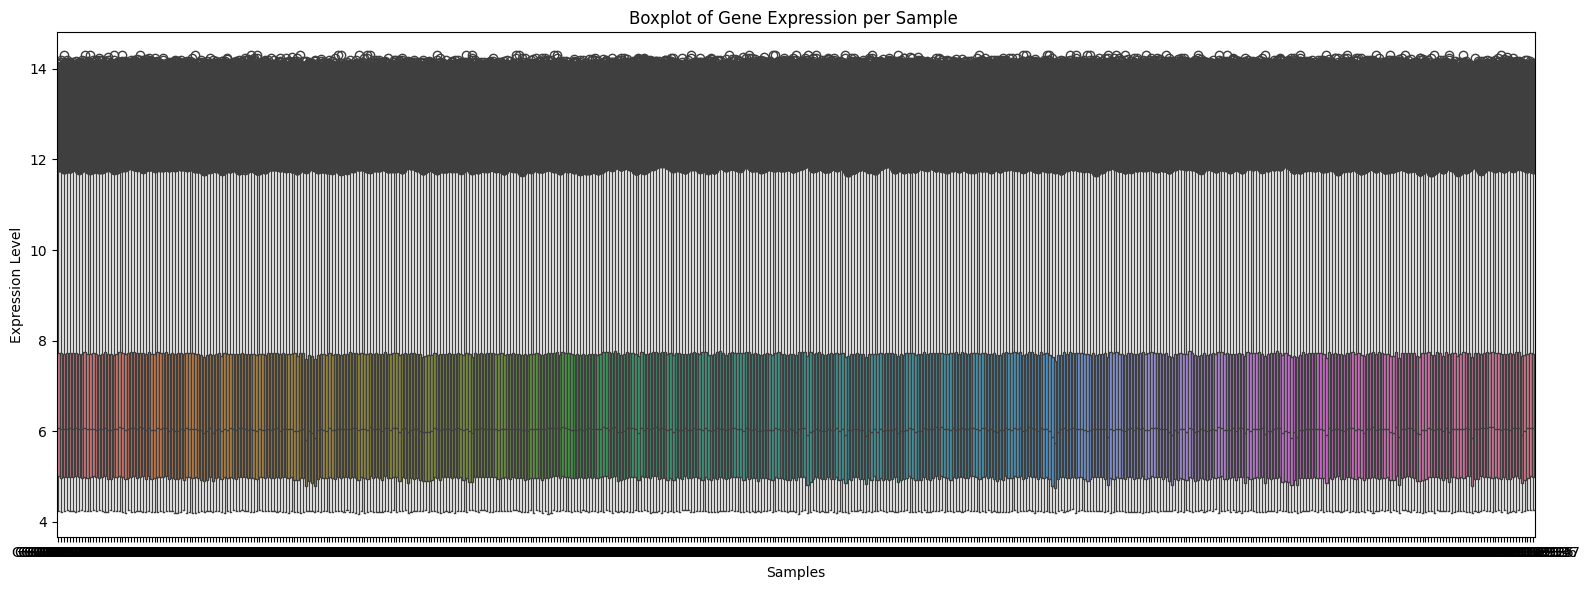

In [93]:
# Might as well just make new boxplot to check the normalisation once again
plt.figure(figsize=(16, 6))
sns.boxplot(data=expression_df)
plt.title("Boxplot of Gene Expression per Sample ")
plt.xlabel("Samples")
plt.ylabel("Expression Level")
plt.tight_layout()
plt.show()

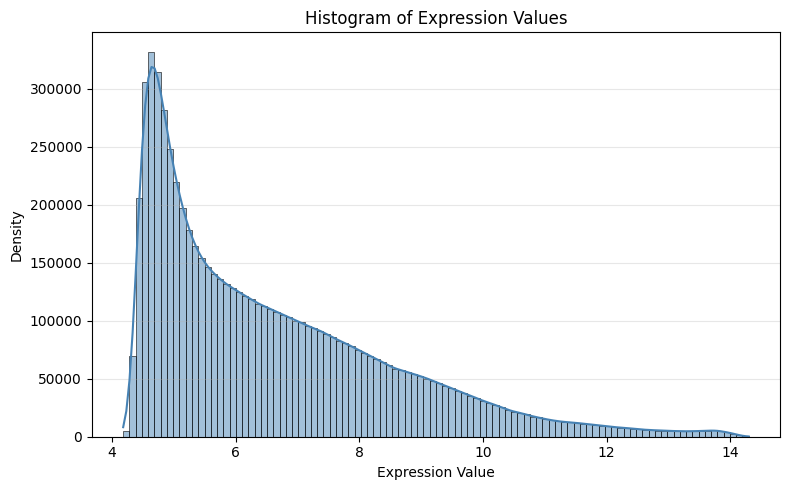

In [94]:
# HISTOGRAM to assess distribution across all expression values
# Convert to a single pandas Series
all_values = expression_df.stack()
# .stack() compresses a 2-dimensional DataFrame down into a 1-dimensional Series by pivoting the columns under the row index.
# So every (gene, sample) pair becomes its own entry in a single column—perfect for passing directly into a histogram function.

# Plot histogram + KDE in one go
plt.figure(figsize=(8, 5))
sns.histplot(
    all_values,
    bins=100,
    kde=True,
    color='steelblue',
    edgecolor='black'
)
plt.title("Histogram of Expression Values")
plt.xlabel("Expression Value")
plt.ylabel("Density")
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

In [95]:
# calculate skewness after droping genes
# FOR NEXT STEP - EXPERIMENT
gene_skew_after = expression_df.skew(axis=1)
median_skew = gene_skew_after.median()
print(median_skew)

0.12045559020508267


[skip] timepoint nan: no matching columns found.


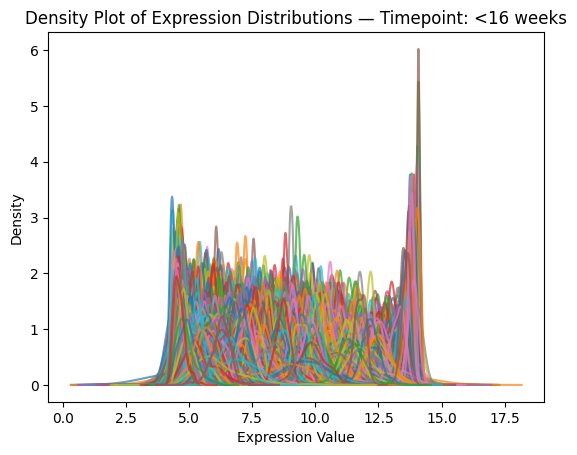

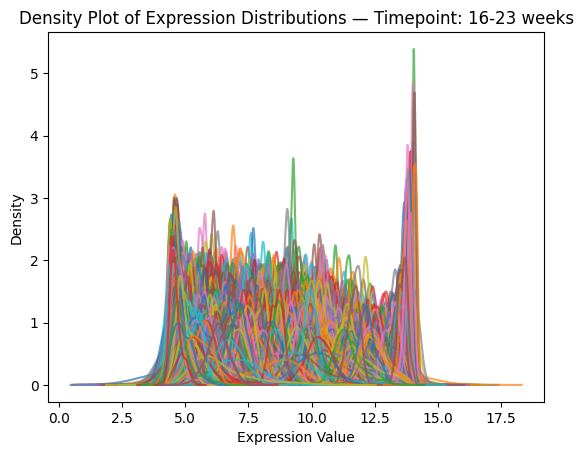

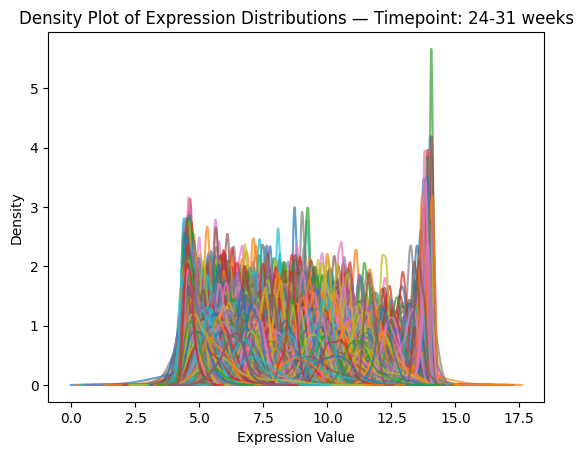

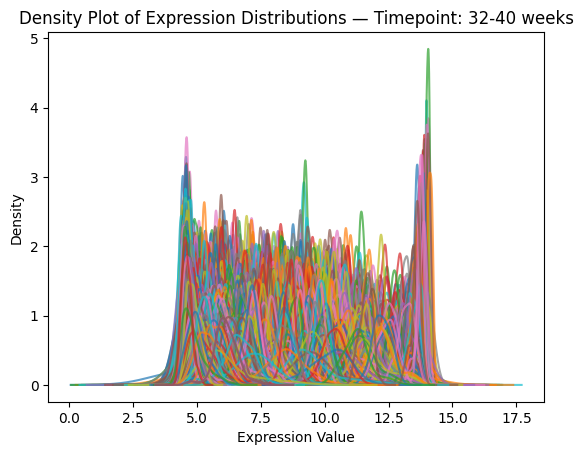

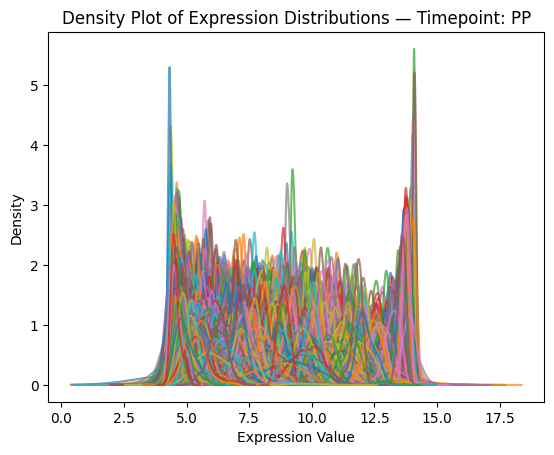

In [102]:
# DO THIS PER TIME POINT TO SEE IF THE EXPRESSION VALUES ALIGN UNDER THESE CIRCUMSTANCES
# list of unique timepoints
timepoints = metadata['time_point'].unique()
# DENSITY PLOT for each timepoint to see if distributions align
for timepoint in timepoints:
    # get the list of samples at this timepoint
    samples_at_timepoint = metadata.loc[metadata['time_point'] == timepoint, 'Sample'].tolist()
    # keep only those present in expression_df.columns (I REMOVED 5 EARLIER)
    samples_at_timepoint = [sample for sample in samples_at_timepoint if sample in expression_df.columns]
    # subset the expression matrix to those samples (columns)
    expression_subset = expression_df[samples_at_timepoint]
    # —— New guard #1: if no columns selected, skip plotting
    if expression_subset.shape[1] == 0:
        print(f"[skip] timepoint {timepoint!r}: no matching columns found.")
        continue
    # transpose so samples are rows, genes are columns, then plot density
    expression_subset = expression_subset.T
    expression_subset.plot(kind='density', legend=False, alpha=0.7)
    plt.title(f"Density Plot of Expression Distributions — Timepoint: {timepoint}")
    plt.xlabel("Expression Value")
    plt.ylabel("Density")
    plt.show()

In [ ]:
# none of them that good, wanna redo them with SLE vs HEALTHY?

[skip] timepoint nan: no matching samples.


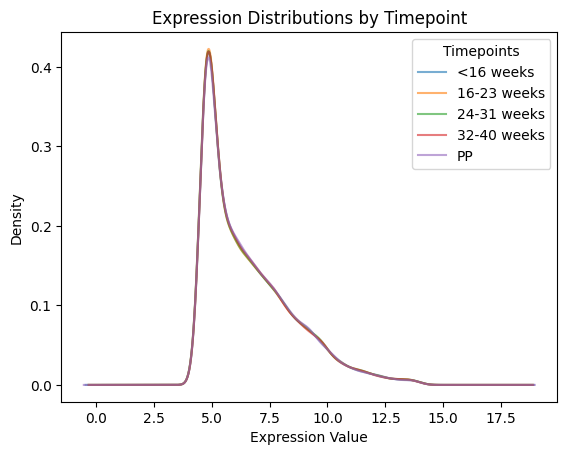

In [121]:
# density plot for all timepoints together to see how they compare
plt.figure()
for timepoint in timepoints:
    samples = metadata.loc[metadata['time_point'] == timepoint, 'Sample'].tolist()
    samples = [sample for sample in samples if sample in expression_df.columns]
    if not samples:
        print(f"[skip] timepoint {timepoint!r}: no matching samples.")
        continue
    expression_subset = expression_df[samples]
    gene_means = expression_subset.mean(axis=1)
    # GUARD: if somehow it's empty or constant, skip
    if gene_means.empty:
        print(f"[skip] timepoint {timepoint!r}: no genes found.")
        continue
    if np.allclose(gene_means, gene_means.iloc[0]):
        print(f"[skip] timepoint {timepoint!r}: all gene means identical.")
        continue
    # plot the density of gene means
    gene_means.plot(kind='density',label=str(timepoint),alpha=0.6)
# OLD CODE: expression_df[samples].plot(kind='density', label=str(timepoint), alpha=0.6)
plt.title("Expression Distributions by Timepoint")
plt.xlabel("Expression Value")
plt.legend(title="Timepoints")
plt.show()

# i suppose this result is acceptable? we want them to overlap

[skip] timepoint nan: no expression values found.


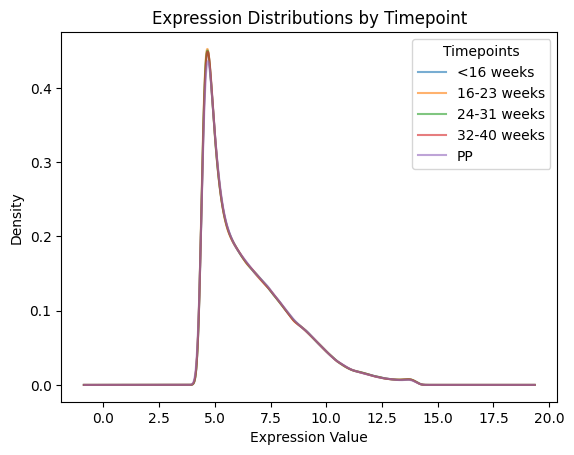

In [123]:
# WITH FLAT VALUES - another way here, just to have an alternative, almost same result
# density plot for all timepoints together to see how they compare
plt.figure()
for timepoint in timepoints:
    samples = metadata.loc[metadata['time_point'] == timepoint, 'Sample'].tolist()
    samples = [sample for sample in samples if sample in expression_df.columns]
    expression_subset = expression_df[samples]
    # expression_df = expression_df.T
    # Flatten all of those values into one long 1-D array
    flat_values = expression_subset.values.flatten()
    if flat_values.size == 0:
        print(f"[skip] timepoint {timepoint!r}: no expression values found.")
        continue
    pd.Series(flat_values).plot(kind='density', label=str(timepoint), alpha=0.6)
# OLD CODE: expression_df[samples].plot(kind='density', label=str(timepoint), alpha=0.6)
plt.title("Expression Distributions by Timepoint")
plt.xlabel("Expression Value")
plt.legend(title="Timepoints")
plt.show()

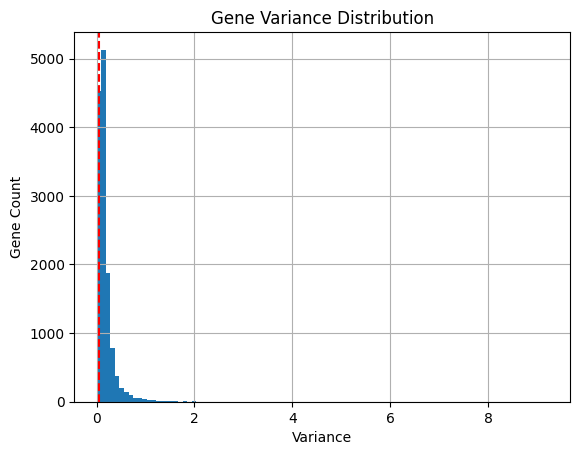

In [ ]:
# FOR NEXT NOTEBOOK, after doing PCA, to start figuring out which method works best for all
# filter out low variance genes
variances = expression_df.var(axis=1)
variances.hist(bins=100)
plt.axvline(x=variances.quantile(0.10), color='red', linestyle='--')
plt.title("Gene Variance Distribution")
plt.xlabel("Variance")
plt.ylabel("Gene Count")
plt.show()
threshold = variances.quantile(0.10)
expression_df = expression_df[variances > threshold]

In [ ]:
# STEP 4
# filter out low expression genes
mean_expression = expression_df.mean(axis=1)
low_expr_thresh = mean_expression.quantile(0.10)
expression_df = expression_df[mean_expression > low_expr_thresh]

In [ ]:
# MA PLOT
# After differential-expression testing
# Purpose: Visualize which genes are significantly up- or down-regulated, and by how much, across the full dynamic range.
# When: Once you have log₂ fold-changes (M) and adjusted p-values (FDR) from a tool like DESeq2, edgeR or limma.
# What to do:
# Plot every gene’s mean expression (A) vs its log₂ fold-change (M).
# Color or size points by significance (e.g. FDR<0.05) and magnitude (e.g. |M|>1).
# Optionally label the top hits.